In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spotify/dataset.csv


In [3]:
df = pd.read_csv('/kaggle/input/spotify/dataset.csv')

In [4]:
df

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [8]:
df['popularity'].value_counts()

popularity
0      16020
22      2354
21      2344
44      2288
1       2140
       ...  
96         7
94         7
95         5
100        2
99         1
Name: count, Length: 101, dtype: int64

In [9]:
df['popularity'].unique()

array([ 73,  55,  57,  71,  82,  58,  74,  80,  56,  69,  52,  62,  54,
        68,  67,  75,  63,  70,   0,   1,  46,  61,  60,  51,  66,  64,
        65,  44,  45,  50,  59,  49,  53,  47,  43,  42,  20,  22,  35,
        19,  24,  18,  23,  40,  38,  41,  30,  37,  39,  48,  36,  34,
        26,  32,  33,  21,  31,  28,  29,  27,  25,  16,   3,  12,   7,
        10,   9,  11,  17,   8,  15,  87,  83,  86,  93,  76,  78,   4,
         2,   5,  85,  81,  84,  72,  79,  77,   6,  13,  14,  89,  96,
       100,  98,  88,  92,  90,  91,  99,  97,  95,  94])

In [11]:
#Проверим пустые значения у каждого признака
df.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [14]:
# Удаляем запись с пустыми значениями
df = df.dropna()

In [15]:
df.isnull().sum()

Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [4]:
import seaborn as sn 
import matplotlib.pyplot as plt
from plotnine import ggplot, aes, geom_line, geom_point, geom_smooth

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


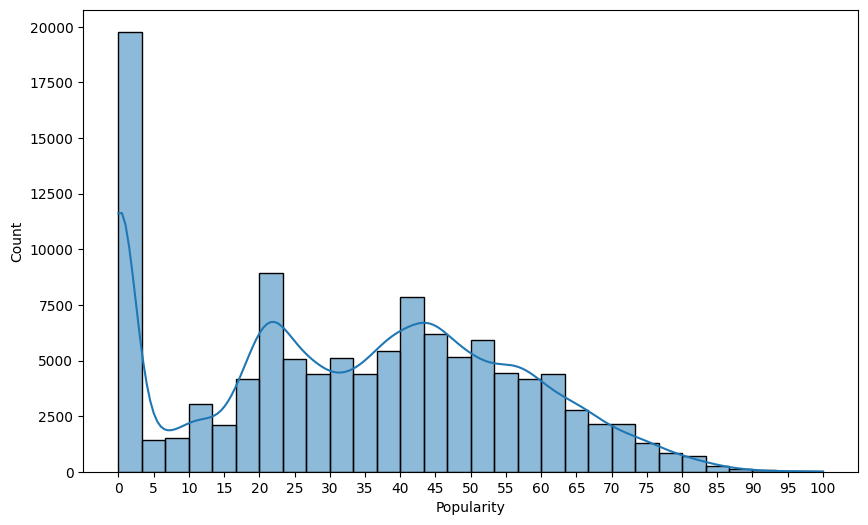

In [13]:
#Для начала посмотрим распределение по популярности треков
plt.figure(figsize=(10, 6))
sn.histplot(data=df['popularity'], bins=30, kde=True)
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.xticks(range(0, 101, 5))
plt.show()

**Вывод:**
Как можно увидеть из графика, есть множество треков с нулевой пуполрностью.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


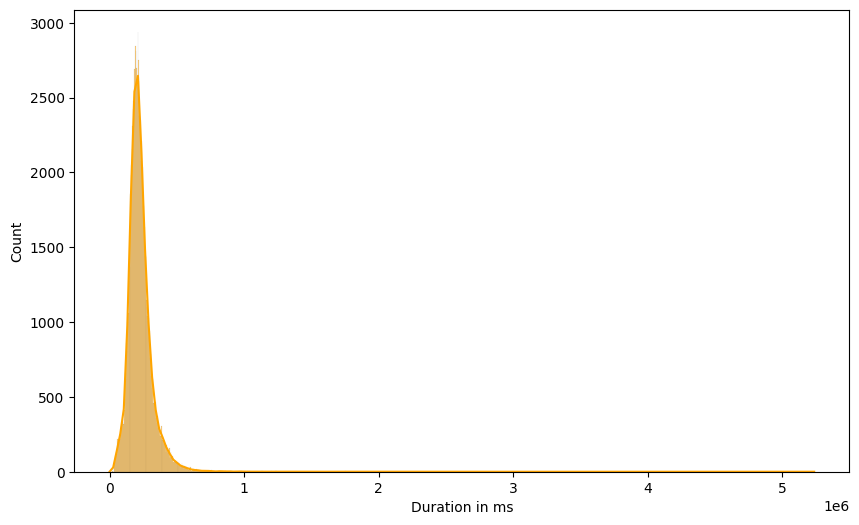

In [25]:
#Проверим распределение по длительности треков
plt.figure(figsize=(10, 6))
sn.histplot(data=df['duration_ms'], kde=True, color='orange')
plt.xlabel('Duration in ms')
plt.ylabel('Count')
plt.show()

График получился крайне неудачный и по нему сложно что-либо сказать, по этой причине постараемся преобразовать данные длительности из миллисекунд в минуты, так будет проще итерпретировать результат.

In [18]:
# Создам новую колонку с названием duration_min и запишу в нее время в минутах
df['duration_min'] = df['duration_ms'].apply(lambda ms: round(ms / 1000 / 60, 1))

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


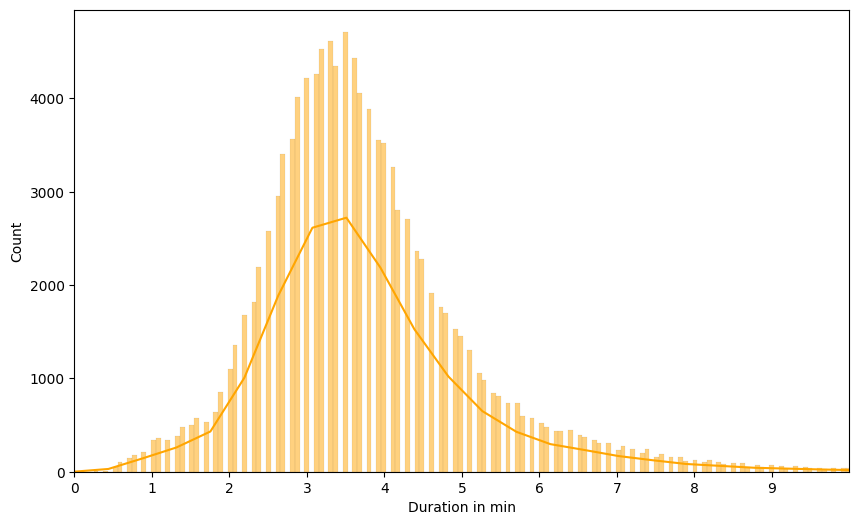

In [24]:
#Еще раз создам график распределения по длительности
plt.figure(figsize=(10, 6))
sn.histplot(data=df['duration_min'], kde=True, color='orange')
plt.xlabel('Duration in min')
plt.ylabel('Count')
#добавила дополнительные ограничения, чтобы график было проще прочитать
plt.xlim(0, 10)  
plt.xticks(np.arange(0, 10, 1))  
plt.show()

**Вывод:**
судя по графику добрая часть треков имеет длительность от 3 до 4 минут

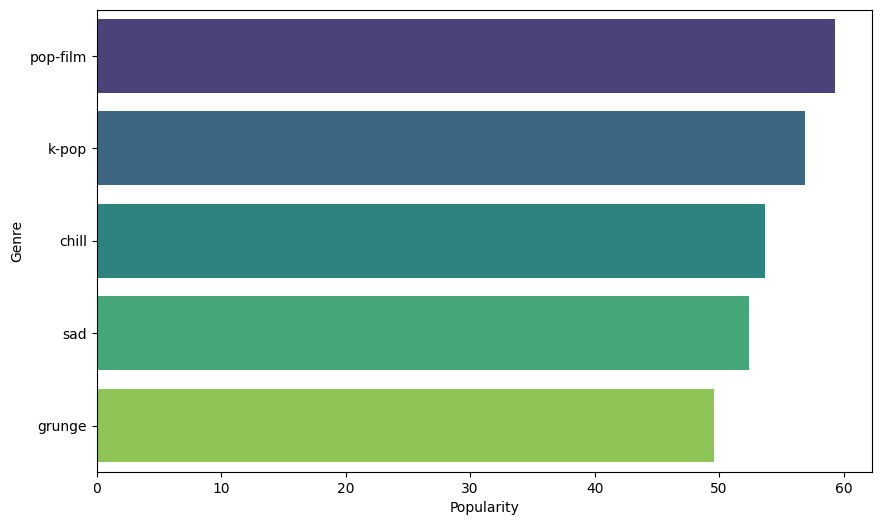

In [29]:
#Посмотрим ситуацию с жанрами и выведем топ-5 самых популярных жанров
top_genres=df.groupby('track_genre')['popularity'].mean().sort_values(ascending=False).head(5)

plt.figure(figsize=(10, 6))
sn.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')
plt.xlabel('Popularity')
plt.ylabel('Genre')
plt.show()

**Вывод:**
По графику видно, что в топ-5 по популярности жанров входят pop-film, 
k-pop, chill, sad, grunge

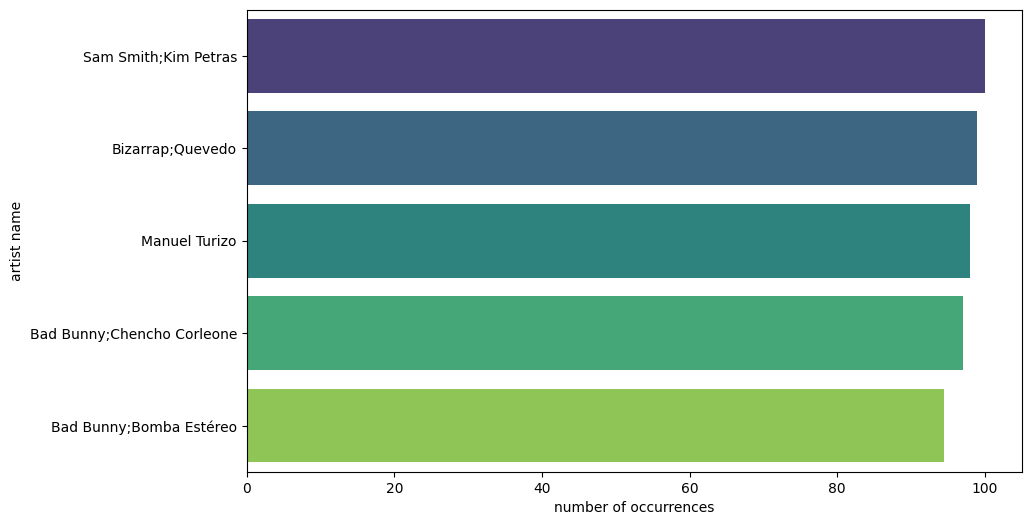

In [30]:
# Также хотелось бы увидеть топ-5 исполнителей
top_artists =top_genres=df.groupby('artists')['popularity'].mean().sort_values(ascending=False).head(5)
plt.figure(figsize=(10, 6))
sn.barplot(x=top_artists.values, y=top_artists.index, palette='viridis')
plt.xlabel('number of occurrences')
plt.ylabel('artist name')
plt.show()

**Вывод:**
Можно увидеть, что в топ-4 входят Sam Smith, Kim Petras,Bizzarap, Quevendo 

**Далее посмотрим, как взаимосвязь призаков влияет на популярность**

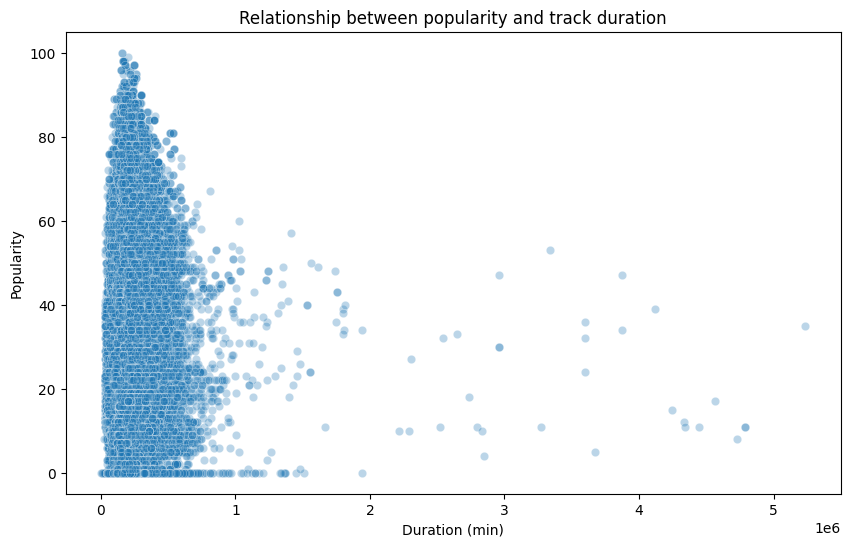

In [26]:
#Сперва посмотрим взаимосвязь длительности и популярности трека
plt.figure(figsize=(10, 6))
sn.scatterplot(x=df['duration_ms'], y=df['popularity'], alpha=0.3)
plt.title("Relationship between popularity and track duration")
plt.xlabel("Duration (min)")
plt.ylabel("Popularity")
plt.show()

**Вывод:**
Треки с с длительностью до минуты имею более высокую популярноть

<Axes: xlabel='energy', ylabel='loudness'>

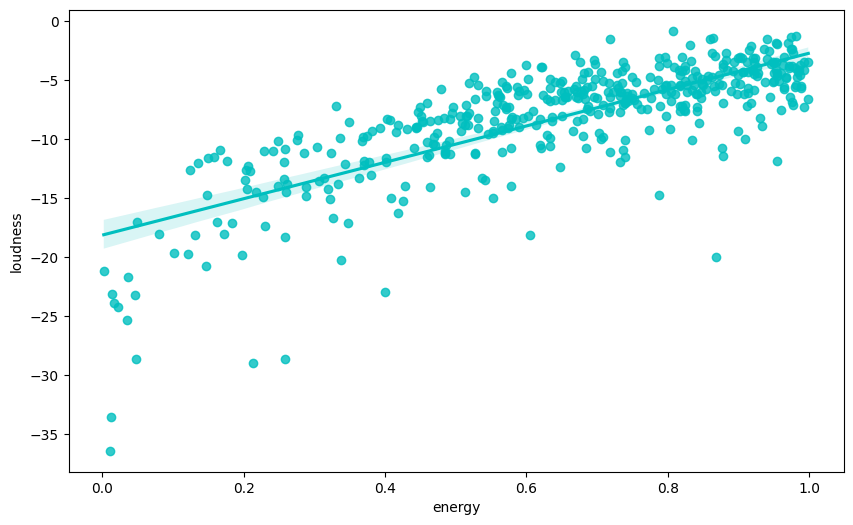

In [31]:
#Проверим корреляцию между признаками энергичности и громкости
sam = df.sample(int(0.004 * len(df)))
plt.figure(figsize=(10,6))
sn.regplot(data=sam, y='loudness', x='energy', color='c')

**Вывод:** между уровнем громкости и энергичностью трека существует положительная линейная зависимость. По мере увеличения энергичности увеличивается и громкость.

Однако видны выбросы, так как в нижней части некоторые точки очень сильно выбиваются из основной тенденции. Это могут быть аномалии или ошибки в данных.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [35]:
#Определение и удаление аномалий
Q1 = df['loudness'].quantile(0.25)
Q3 = df['loudness'].quantile(0.75)
IQR = Q3 - Q1

# Границы для определения выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Определение медианы
median = df['loudness'].median()

# Замена выбросов на медиану
df['loudness'] = df['loudness'].apply(lambda x: median if (x < lower_bound or x > upper_bound) else x)

In [16]:
#Выделим категориальные и числовые признаки 
#и преобразуем их к числовому типу
categorial_cols = df.select_dtypes(include=["object", "bool"]).columns
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

for col in categorial_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

#Выведем данные после изменения:
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,-1.732036,62846,10357,8100,11741,1.782627,0.024575,0,0.629244,-0.717148,...,0.300828,-1.326281,0.551848,-0.850202,-0.504109,0.758743,0.929306,-1.141863,0.221823,0
1,-1.732005,55668,3287,14796,22528,0.975633,-0.730859,0,-0.845908,-1.889980,...,-1.784744,0.753988,-0.078993,1.831732,-0.504094,-0.591211,-0.798690,-1.489717,0.221823,0
2,-1.731975,19766,12397,39162,60774,1.065299,-0.160332,0,-0.742186,-1.122669,...,-0.293288,0.753988,-0.273826,-0.315499,-0.504112,-0.507167,-1.365688,-1.528312,0.221823,0
3,-1.731944,77942,14839,8580,9580,1.692961,-0.243214,0,-1.733304,-2.312994,...,-2.039252,0.753988,-0.457309,1.774593,-0.503883,-0.428376,-1.276974,1.987859,-2.089680,0
4,-1.731914,68242,5255,16899,25689,2.186125,-0.271919,0,0.295030,-0.788711,...,-0.282750,0.753988,-0.303145,0.463399,-0.504112,-0.686285,-1.184403,-0.073348,0.221823,0


In [11]:
#Переводим числовые признаки к единому масштабу
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

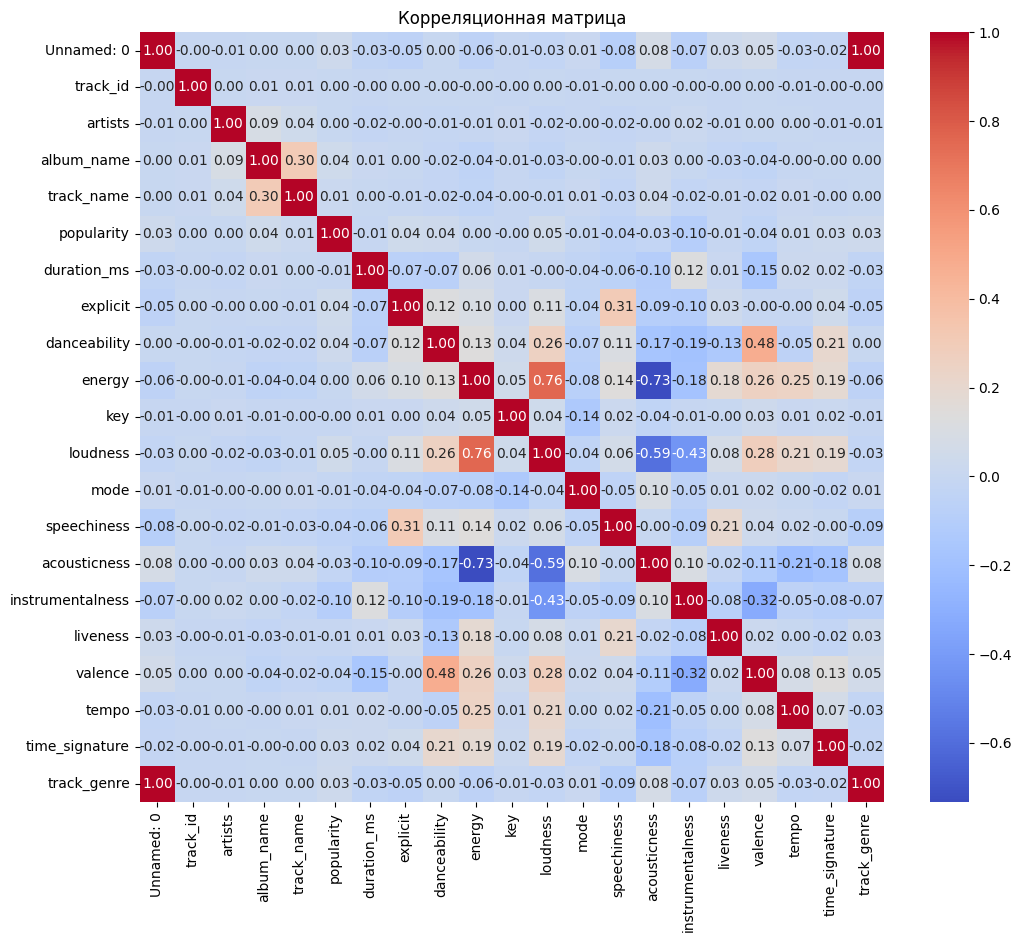

In [12]:
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sn.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

Видно, что признаки loudness и energy скоррелированы сильно
Acousticness и energy имеют самую большую отрицательную корреляцию

In [43]:
#Проверим корреляцию
correlation = df.corr()
correlation_target = correlation['popularity'].sort_values(ascending=False)
correlation_target

popularity          1.000000
explicit            0.044082
album_name          0.042476
danceability        0.035448
track_genre         0.032692
Unnamed: 0          0.032142
time_signature      0.031073
loudness            0.017526
tempo               0.013205
track_name          0.011911
artists             0.003613
track_id            0.003243
energy              0.001056
key                -0.003853
liveness           -0.005387
duration_ms        -0.007101
duration_min       -0.007139
mode               -0.013931
acousticness       -0.025472
valence            -0.040534
speechiness        -0.044927
instrumentalness   -0.095139
Name: popularity, dtype: float64

**Признаки с положительной корреляцией:**
explicit(0.044), album_name(0.042), danceability(0.035), track_genre(0.033)
Признаки имеют слабую корреляцию с популярностью. Это означает, что с ростом данных показателей популярность трека может увеличиться, но не значительно.

Остальные признаки положительной корреляции очень незначительны.

**Признаки с отрицательной корреляцией**
instrumental(-0.095)
В данном случае это самая сильная и слабая отрицательная корреляция. Можно сделать вывод, что треки с инструментальной музыкой менее популярны.
valence(-0.041):
Эмоциональный тон музыки слегка отрицательно коррелирует с популярностью, что может быть связано с предпочтениями слушателей более "грустной" или нейтральной музыки.
speechiness(-0.045):
Треки с большим количеством речевых элементов (например, подкасты или разговорные песни) имеют слабую отрицательную связь с популярностью.

Остальные признаки имеют незначительное влияние.



**Выводы:**

Можно удалить все песни с длительностью 0, так как это вероятнее всего ошибки в данных

Признак energy можно удалить, так как он имеет достаточно высокую корреляцию с громкостью

Также можно заметить, что в датасете нет признаков с нормальным распределением

# Корреляция новых колонок с таргетом. Feature Importances. Простая модель.

In [20]:
#Уберу ненужные признаки для анализа, так как они ни на что не влияют
data = df.drop(columns=["artists", "energy"])
data = data[data['duration_ms'] > 0]
data

,Unnamed: 0,track_id,album_name,track_name,popularity,duration_ms,explicit,danceability,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,-1.732036,62846,8100,11741,1.782627,0.024575,0,0.629244,-1.210442,0.300828,-1.326281,0.551848,-0.850202,-0.504109,0.758743,0.929306,-1.141863,0.221823,0
6,-1.731853,74961,18765,51044,1.827460,0.012776,0,-0.920818,-0.929541,-0.111952,0.753988,-0.464875,1.630242,-0.504103,-0.642162,-1.533474,0.638339,-2.089680,0
7,-1.731823,14348,41972,27754,2.096458,0.139024,0,0.784827,1.598569,-0.213158,0.753988,-0.406236,0.734058,-0.504112,-0.610646,0.917734,0.961108,0.221823,0
10,-1.731732,55087,12247,22713,1.827460,0.156303,0,0.346891,0.755866,0.026238,0.753988,-0.525405,-0.107993,-0.504112,-0.634283,-0.667547,-0.741970,0.221823,0
11,-1.731701,65827,22403,27404,1.603295,0.113105,0,-0.482882,-0.367739,-0.357711,0.753988,-0.394887,1.140047,-0.504112,-0.517672,-1.292403,0.375547,-2.089680,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,1.731914,25199,66,53329,-0.548691,1.462944,0,-2.274962,-0.086838,-1.617326,0.753988,-0.401507,0.977652,2.493755,-0.668426,-1.697787,0.128333,2.533326,113
113996,1.731944,19583,66,65090,-0.503858,1.462953,0,-2.263437,-1.491343,-2.000082,-1.326281,-0.421369,2.042245,2.648817,-0.570200,-1.693545,-1.231195,0.221823,113
113997,1.731975,80127,5028,38207,-0.503858,0.404827,0,0.358416,-1.491343,-0.524135,-1.326281,-0.403399,1.660315,-0.504112,-0.681033,1.037306,0.341255,0.221823,113
113998,1.732005,30456,7238,21507,0.347970,0.520646,0,0.116398,0.474964,-0.522942,0.753988,-0.519731,0.198754,-0.504112,0.296502,-0.235548,0.460742,0.221823,113


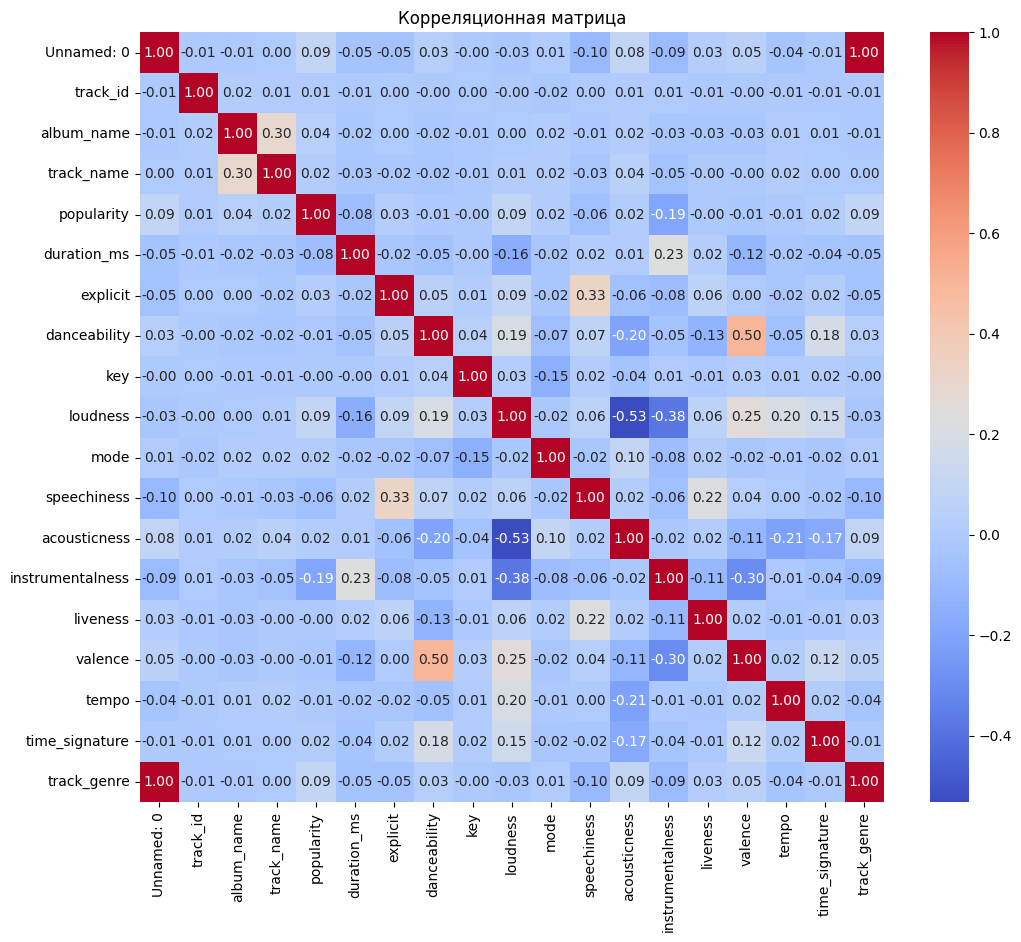

In [21]:
#Выведем корреляцию после преобразований
plt.figure(figsize=(12, 10))
correlation_matrix = data.corr()
sn.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

Как можно увидеть корреляция улучшилась, так как сильно скоррелированных признаков нет

             Feature  Importance
0         Unnamed: 0    0.293513
12  instrumentalness    0.070764
11      acousticness    0.063097
10       speechiness    0.059777
2         album_name    0.059640
6       danceability    0.053354
14           valence    0.051025
8           loudness    0.050994
4        duration_ms    0.050228
15             tempo    0.047295
17       track_genre    0.046384
3         track_name    0.042778
13          liveness    0.042451
1           track_id    0.034900
7                key    0.020144
5           explicit    0.006581
9               mode    0.004275
16    time_signature    0.002799


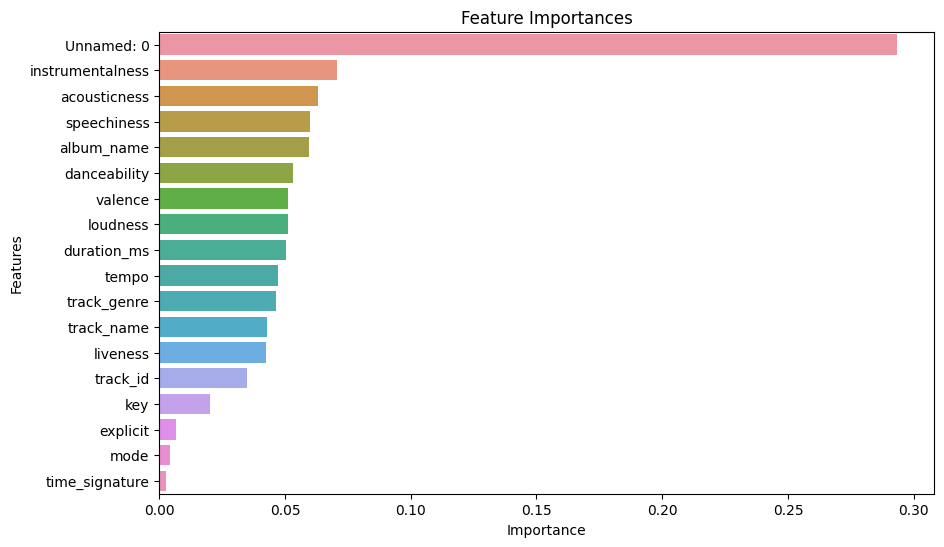

In [66]:
#Feature importances
from sklearn.ensemble import RandomForestRegressor

# Отделяем целевую переменную
X = data.drop(columns=['popularity'])
y = data['popularity']

#Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Обучаем Random Forest
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Получаем важность признаков
importances = model.feature_importances_
features = X.columns
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Выводим важность
print(feature_importances)

# Строим график
plt.figure(figsize=(10, 6))
sn.barplot(x=feature_importances['Importance'], y=feature_importances['Feature'])
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

Как видим первые 5 самых важных признаков: instrumentalness, track_genre, speechiness, acousticness, denceability

In [67]:
#Построим простую модель
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

preds = model.predict(x_test)

# Оценка качества модели
mae = mean_absolute_error(y_test, preds)
mse = mean_squared_error(y_test, preds)
r2 = r2_score(y_test, preds)
mape = mean_absolute_percentage_error(y_test, preds)


print(f"\nОценка модели:")
print(
    """
    mse: {mse}
    mae: {mae}
    r2: {r2}
    mape: {mape}
    """.format(mse=mse, mae=mae, r2=r2, mape=mape)
)


Оценка модели:

    mse: 0.40098464736030015
    mae: 0.4409525051945561
    r2: 0.5499168534314127
    mape: 1.018212435118513
    


# Эксперименты с моделями обучения + кросс валидация

In [33]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor

In [57]:
#Линейная модель
#Обучение модели на обучающих данных
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"\nОценка модели:")
print(f"MAE (Mean Absolute Error): {mae:.2f}") # Средняя абсолютная ошибка
print(f"MSE (Mean Squared Error): {mse:.2f}") # Средняя квадратная ошибка
print(f"R^2 (R-squared): {r2:.2f}")


Оценка модели:
MAE (Mean Absolute Error): 0.74
MSE (Mean Squared Error): 0.83
R^2 (R-squared): 0.07


In [58]:
#Дерево решений
model = DecisionTreeRegressor(max_depth=10, random_state=42)
model.fit(X_train, y_train)

# Предсказания и оценка
predictions = model.predict(X_test)

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"\nОценка модели:")
# Средняя абсолютная ошибка
print(f"MAE (Mean Absolute Error): {mae:.2f}") 
# Средняя квадратная ошибка
print(f"MSE (Mean Squared Error): {mse:.2f}") 
# Коэффициент детерминации
print(f"R^2 (R-squared): {r2:.2f}")




Оценка модели:
MAE (Mean Absolute Error): 0.59
MSE (Mean Squared Error): 0.67
R^2 (R-squared): 0.24


In [73]:
#Нейронные сети
reg = MLPRegressor(hidden_layer_sizes=(150, 100, 50), random_state=42)
reg.fit(X_train, y_train)
predictions = reg.predict(X_test)

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"\nОценка модели:")
# Средняя абсолютная ошибка
print(f"MAE (Mean Absolute Error): {mae:.2f}") 
# Средняя квадратная ошибка
print(f"MSE (Mean Squared Error): {mse:.2f}") 
# Коэффициент детерминации
print(f"R^2 (R-squared): {r2:.2f}") 


Оценка модели:
MAE (Mean Absolute Error): 4.87
MSE (Mean Squared Error): 41.85
R^2 (R-squared): -41.19


In [68]:
#Градиентный бустинг
reg = GradientBoostingRegressor(max_depth=8, n_estimators=200, learning_rate=0.1)
reg.fit(X_train, y_train)
predictions = reg.predict(X_test)

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"\nОценка модели:")
# Средняя абсолютная ошибка
print(f"MAE (Mean Absolute Error): {mae:.2f}") 
# Средняя квадратная ошибка
print(f"MSE (Mean Squared Error): {mse:.2f}") 
# Коэффициент детерминации
print(f"R^2 (R-squared): {r2:.2f}") 


Оценка модели:
MAE (Mean Absolute Error): 0.42
MSE (Mean Squared Error): 0.34
R^2 (R-squared): 0.62


In [71]:
scores = cross_val_score(reg, X_train, y_train, cv=5)
print("Значения для каждого фолда:", scores)
print("Среднее значение кросс-валидации:", scores.mean())

Значения для каждого фолда: [0.56987415 0.59213326 0.59165094 0.59008996 0.59536742]
Среднее значение кросс-валидации: 0.5878231475031875


# Вывод

Как можно увидеть самый лучший результат наблюдается у модели, которая обучалась с помощью градиентного бустинга. Эта модель точнее и эффективнее, так как у неё меньше ошибки (MAE и MSE) и лучше показатель объяснённой вариации (R²).

Среднее значение кросс-валидации для градиентного спуска: ~0.59

В Нейронных сетях R2 является отрицательным показателем,указывающее, что модель хуже тривиального предсказания среднего значения.